<a href="https://colab.research.google.com/github/arumm25/Repo1-PenambanganData/blob/main/Repository2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

path = '/content/drive/MyDrive/Penambangan Data/dataKasus-1.xlsx'
df = pd.read_excel(path)
df.head()


,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              558 non-null    object
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   554 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
 12  Unnamed: 12           

,0
NO,0
NAMA,0
USIA,3
PARITAS,0
JARAK KELAHIRAN,7
RIW HIPERTENSI,0
RIW PE,0
OBESITAS,0
RIW DM,0
RIW HIPERTENSI/PE DALAM KELUARGA,0


In [4]:
df = df.dropna()   # atau fillna()


In [6]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# First, clean and convert 'USIA' to numeric
# Remove 'TH' or 'th' and then convert to numeric, coercing errors to NaN
df['USIA'] = df['USIA'].astype(str).str.replace(r'[T|t][H|h]', '', regex=True).str.strip()
df['USIA'] = pd.to_numeric(df['USIA'], errors='coerce')

# Now, apply LabelEncoder to the remaining object columns (which should be purely categorical strings)
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [8]:
X = df.drop('PE/Non PE', axis=1)
y = df['PE/Non PE']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

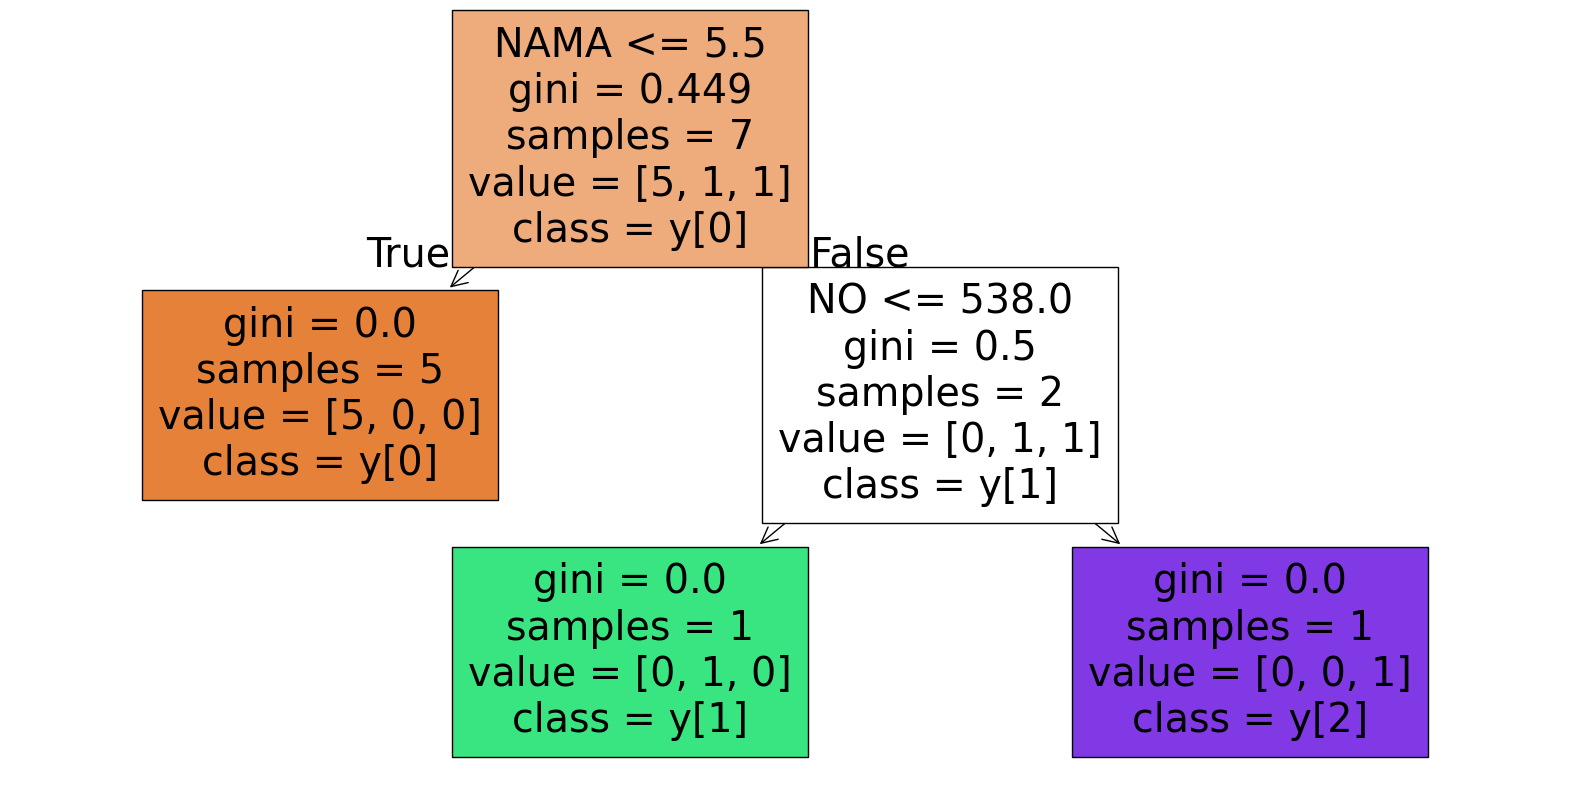

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=True, filled=True)
plt.show()


In [11]:
from sklearn.tree import export_text
rules = export_text(dt, feature_names=list(X.columns))
print(rules)


|--- NAMA <= 5.50
|   |--- class: 0
|--- NAMA >  5.50
|   |--- NO <= 538.00
|   |   |--- class: 1
|   |--- NO >  538.00
|   |   |--- class: 2



In [12]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=5)
reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
prediksi = model.predict(X_test)


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
df.head()


,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12,cluster
11,12,0,24,1,2,1,1,0,0,1,1,0,1,2
28,29,3,28,2,0,1,1,0,0,1,0,0,0,2
171,173,1,31,1,2,0,1,0,0,0,1,0,3,0
228,230,2,21,1,2,1,0,0,0,1,1,0,4,0
438,440,4,20,1,2,0,1,0,0,1,0,0,5,1


In [16]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# The apriori function requires a DataFrame with boolean values (True/False) or 0/1 integers.
# The current DataFrame 'df' contains label-encoded integers and a 'cluster' column,
# which can have values greater than 1. This causes the ValueError.

# Identify columns suitable for association rule mining.
# Exclude identifiers ('NO') and potentially continuous variables ('USIA') as they are not typically
# used directly in their numerical form for association rules without binning.
# The other columns are already label-encoded categorical values or cluster assignments.

cols_to_onehot = [
    'NAMA', 'PARITAS', 'JARAK KELAHIRAN', 'RIW HIPERTENSI', 'RIW PE',
    'OBESITAS', 'RIW DM', 'RIW HIPERTENSI/PE DALAM KELUARGA',
    'SOSEK RENDAH', 'PE/Non PE', 'Unnamed: 12', 'cluster'
]

# Create a new DataFrame with only the selected columns
df_apriori = df[cols_to_onehot]

# Convert the selected columns into one-hot encoded format.
# We use .astype(str) to ensure that pandas treats the numerical codes as distinct categories
# when creating dummy variables, and to generate meaningful column names (e.g., 'PARITAS_is_1').
df_encoded = pd.get_dummies(df_apriori.astype(str), prefix_sep='_is_')

# Now apply the apriori algorithm to the one-hot encoded DataFrame
frequent = apriori(df_encoded, min_support=0.3, use_colnames=True)
rules = association_rules(frequent, metric="confidence", min_threshold=0.7)
rules.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(JARAK KELAHIRAN_is_2),(PARITAS_is_1),0.666667,0.666667,0.666667,1.000000,1.5000,1.0,0.222222,inf,1.000000,1.000000,1.0,1.000000
1,(PARITAS_is_1),(JARAK KELAHIRAN_is_2),0.666667,0.666667,0.666667,1.000000,1.5000,1.0,0.222222,inf,1.000000,1.000000,1.0,1.000000
2,(PARITAS_is_1),(RIW PE_is_1),0.666667,0.888889,0.555556,0.833333,0.9375,1.0,-0.037037,0.666667,-0.166667,0.555556,-0.5,0.729167
3,(PARITAS_is_1),(OBESITAS_is_0),0.666667,1.000000,0.666667,1.000000,1.0000,1.0,0.000000,inf,0.000000,0.666667,0.0,0.833333
4,(PARITAS_is_1),(RIW DM_is_0),0.666667,1.000000,0.666667,1.000000,1.0000,1.0,0.000000,inf,0.000000,0.666667,0.0,0.833333


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [17]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Accuracy: 0.5
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_c

In [19]:
import joblib
import os

# Define the path for the model
model_path = '/content/drive/MyDrive/model/dt_model.pkl'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model
joblib.dump(dt, model_path)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

['/content/drive/MyDrive/model/dt_model.pkl']

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [20]:
model = joblib.load('/content/drive/MyDrive/model/dt_model.pkl')


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag